### Intro to Simulation-Based Inference, previously named as Approximate Bayes Computation  (ABC) or Likelihood Free Inference (LFI). 
#### Traditionally, in the Bayes scheme you can get the posterior given the likelihood $p(x| \theta )$ and prior $p (\theta)$ distributions: 
$$
p (\theta | x) = \frac{ p(x | \theta) p(\theta) }{ p (x)},
$$
#### where the "evidence" is calculated by 
$$
p(x) = \int_{\theta}  p (x | \theta) p (\theta) d \theta.
$$

#### Traditionally, to get the posterior we use: MCMC, Nested Sampling, Hamiltonian Monte Carlo, etc. Furthermore, the SBI approach is different, motived by: 
* What if you don't even access to the likelihood? It isn't possible express $p(x | \theta)$ analytically. But you have a stochastic process that generates the data given a parameter, so you can only sample from it. 

Note: A stochastic process is a collection of random variables, that describes the evolution of a system of random viables over time. 


$$
\theta \rightarrow Simulator \rightarrow x
$$

Now the task becomes to find the posterior distribution of the parameters given our empirical "observed data".
* We can create unlimited $x_sim$ but we want find the parameters that mostly fit the observational data. 

## Rejection Appriximate Bayes Computation
### Resources: 
* Approximate Bayesian Computation: https://bayesiancomputationbook.com/markdown/chp_08.html 
* Overview of Approximate Bayesian Computation (Slides) by Chad M. Schafer: https://indico.cern.ch/event/937896/attachments/2074639/3483509/ABClectureSchaferHandout.pdf

#### This is one of the first algorithm for the intractable likelihood problem, i.e. we don't know $p(x | \theta)$, but how we can still get a sample of the posterior $p(\theta | x)$? 

#### ABC rejection algorithm (from: https://www.researchgate.net/publication/45880117_Tutorial_on_ABC_rejection_and_ABC_SMC_for_parameter_estimation_and_model_selection )
1. Define a prior distribution $P(\theta)$ and we would like to approximate the posterior distribution  $P(\theta | D_0)$ ($D_0$ is the experimental data). First, sample a parameter 
$\theta *$ from the prior distribution, this sampled parameter is called *a particle*.
2. From a simulate data set $D*$ according to some simulation framework $f(D|\theta*)$, we compare the simulated data ser $D*$ to the experimental data $D_0$ using a distance function $d$ and a tolerance $\epsilon$, we can use these for define a condition, we accept $\theta* $ if 
$$
d(D_0,D*) \leq \epsilon. 
$$
3. We accept $\theta*$ due $D*$ and $D_0$ are sufficiently close. 
4. We repeat the whole procesdure until $N$ particles have been accepted. They represent a sample from $(P  (\theta | d(D_0, D*)) \leq \epsilon )$, which approximates the posterior distribution. 

#### However, during the process many particles were rejected in the procedure, for which we have spent a lot of computational effort for simulation. ABC rejection is therefore computationally inefficient.

#### Note: If we simulate a deterministic dynamical model, we add some noise at the time points of interest. If we simulate a stochastic dynamical model, we do not add any additional noise to the trajectories.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
import pandas as pd

In [ ]:
# Estimating the mean of a normal distribution with known variancerando
# random seed
np.random.seed(42)
# this is the true mean value 
mean_tru = 2.5

# This is the "true data"

data_obs = np.random.normal(mean_tru,1.0,100)


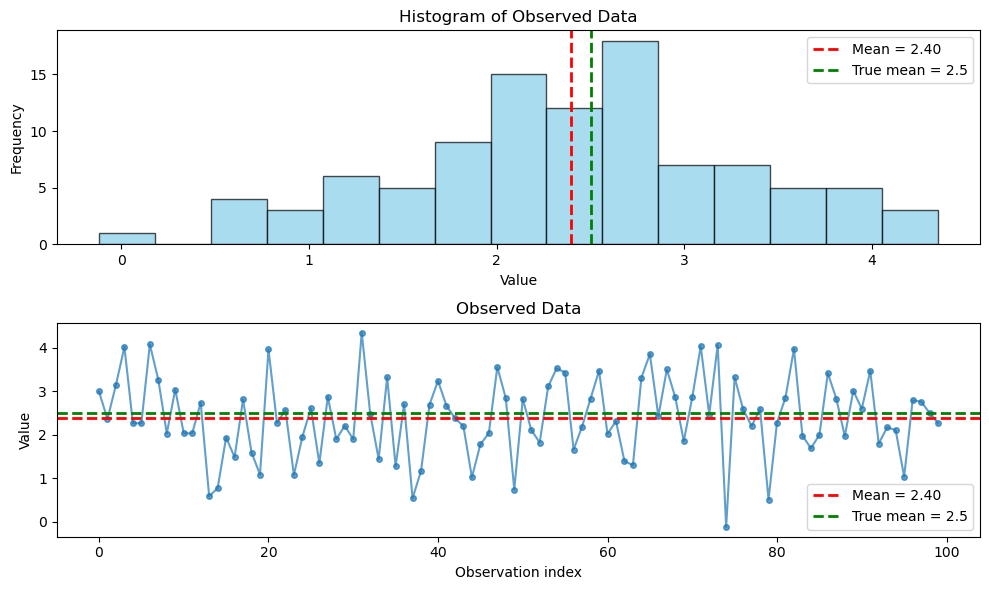


Additional statistics:
Observed data minimum: -0.120
Observed data maximum: 4.352
Observed data median: 2.373


In [ ]:
plt.figure(figsize=(10, 6))

# Histogram of the observed data
plt.subplot(2, 1, 1)
plt.hist(data_obs, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(data_obs), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(data_obs):.2f}')
plt.axvline(mean_tru, color='green', linestyle='--', linewidth=2, label=f'True mean = {mean_tru}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Observed Data')
plt.legend()

# Time series of the observed data
plt.subplot(2, 1, 2)
plt.plot(data_obs, 'o-', alpha=0.7, markersize=4)
plt.axhline(np.mean(data_obs), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(data_obs):.2f}')
plt.axhline(mean_tru, color='green', linestyle='--', linewidth=2, label=f'True mean = {mean_tru}')
plt.xlabel('Observation index')
plt.ylabel('Value')
plt.title('Observed Data')
plt.legend()

plt.tight_layout()


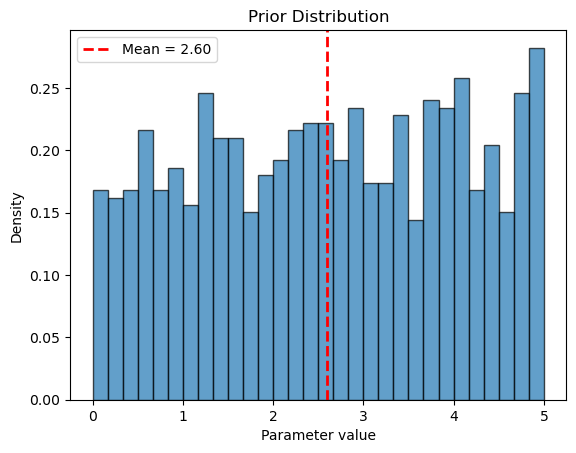

In [66]:
# The next step is define a prior distribution 
def prior():
    # uniform distribution from 0 to 5 
    return uniform.rvs(loc=0,scale=5)


prior_samples = [prior() for _ in range(1000)]
plt.hist(prior_samples, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(prior_samples), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(prior_samples):.2f}')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.title('Prior Distribution')
plt.legend()
plt.show()


(array([0.0491562 , 0.        , 0.        , 0.        , 0.0491562 ,
        0.0491562 , 0.0491562 , 0.0491562 , 0.        , 0.14746861,
        0.24578102, 0.29493722, 0.24578102, 0.39324963, 0.24578102,
        0.44240583, 0.39324963, 0.19662481, 0.19662481, 0.34409343,
        0.14746861, 0.19662481, 0.0491562 , 0.14746861, 0.19662481,
        0.34409343, 0.24578102, 0.0491562 , 0.09831241, 0.0491562 ]),
 array([-2.06471949, -1.86128636, -1.65785324, -1.45442012, -1.250987  ,
        -1.04755387, -0.84412075, -0.64068763, -0.43725451, -0.23382138,
        -0.03038826,  0.17304486,  0.37647798,  0.57991111,  0.78334423,
         0.98677735,  1.19021047,  1.3936436 ,  1.59707672,  1.80050984,
         2.00394296,  2.20737608,  2.41080921,  2.61424233,  2.81767545,
         3.02110857,  3.2245417 ,  3.42797482,  3.63140794,  3.83484106,
         4.03827419]),
 <BarContainer object of 30 artists>)

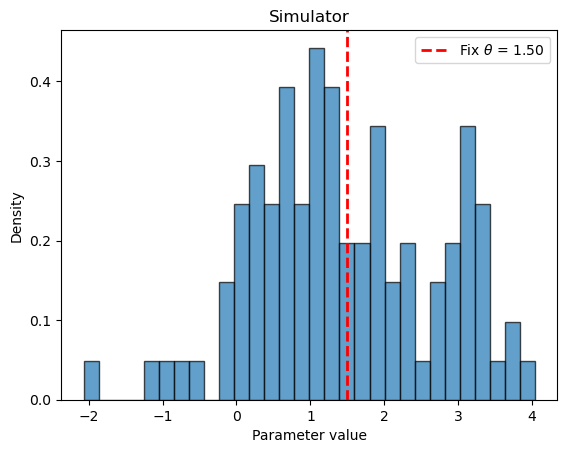

In [67]:
# step 3: Now we need define a simulatior, from a parameter theta 

def simulator(theta):
    return np.random.normal(theta,1,100)

# keep in main that this parameter represent the mean of the distribution 
fix_theta = 1.5
test_simulator1 = simulator(fix_theta)
plt.axvline(1.5, color='red', linestyle='--', linewidth=2, label=f'Fix $\\theta$ = {fix_theta:.2f}')
plt.legend()
plt.ylabel("Density")
plt.xlabel("Parameter value")
plt.title("Simulator")
plt.hist(test_simulator1, bins=30, density=True, alpha=0.7, edgecolor='black')


In [56]:
# step 4: We need to choose a rule of "closeness" of our simulations with the true observations.
# we use the simplest rule of distance for this 
def distance(observed, simulated):
    return abs(np.mean(observed) - np.mean(simulated))

# Test the distance function
test_distance = distance(data_obs,test_simulator1)
print(f"Distance between observed and simulated data: {test_distance:.3f}")


Distance between observed and simulated data: 0.824


In [57]:
# step 5: implement the ABC rejection algorith with the observational data, the prior distribution and 
# the simulator. 
def abc_rejection(prior, simulator, distance, observed_data, epsilon, n_accepted):
    """
    epsilon: tolerance threshold for accepting parameters
    n_accepted: number of particles to accept
    
    Returns:
    accepted_particles: list of accepted parameter values
    total_simulations: total number of simulations performed
    """
    
    # Initialize an empty list to store accepted particles
    accepted_particles = []
    total_simulations = 0
    
    print(f"Starting ABC rejection. Need to accept {n_accepted} particles.")
    
    while len(accepted_particles) < n_accepted:
        # Step 1: Sample a parameter from the prior distribution (a particle)
        theta_star = prior()
        
        # Step 2: Simulate data using the sampled parameter
        simulated_data = simulator(theta_star)
        
        # Count the total number of simulations
        total_simulations += 1
        
        # Step 3: Calculate distance between simulated and observed data
        d = distance(observed_data, simulated_data)
        
        # Step 4: Accept the particle if distance is within tolerance
        if d <= epsilon:
            accepted_particles.append(theta_star)
            
            # Print progress every 10 accepted particles
            if len(accepted_particles) % 10 == 0:
                print(f"Accepted {len(accepted_particles)} particles. "
                      f"Acceptance rate: {len(accepted_particles)/total_simulations:.4f}")
    
    # Return the accepted particles
    print(f"Completed! Total simulations: {total_simulations}. "
          f"Final acceptance rate: {len(accepted_particles)/total_simulations:.4f}")
    
    return np.array(accepted_particles), total_simulations

In [71]:
# step 6: Run the rejection ABC algorithm 
epsilon = 0.0002

# Number of particles to accept
n_accepted = 10000

# Run the ABC rejection algorithm
accepted_particles, total_simulations = abc_rejection(
    prior, simulator, distance, data_obs, epsilon, n_accepted
)

Starting ABC rejection. Need to accept 10000 particles.
Accepted 10 particles. Acceptance rate: 0.0001
Accepted 20 particles. Acceptance rate: 0.0001
Accepted 30 particles. Acceptance rate: 0.0001
Accepted 40 particles. Acceptance rate: 0.0001
Accepted 50 particles. Acceptance rate: 0.0001
Accepted 60 particles. Acceptance rate: 0.0001
Accepted 70 particles. Acceptance rate: 0.0001
Accepted 80 particles. Acceptance rate: 0.0001
Accepted 90 particles. Acceptance rate: 0.0001
Accepted 100 particles. Acceptance rate: 0.0001
Accepted 110 particles. Acceptance rate: 0.0001
Accepted 120 particles. Acceptance rate: 0.0001
Accepted 130 particles. Acceptance rate: 0.0001
Accepted 140 particles. Acceptance rate: 0.0001
Accepted 150 particles. Acceptance rate: 0.0001
Accepted 160 particles. Acceptance rate: 0.0001
Accepted 170 particles. Acceptance rate: 0.0001
Accepted 180 particles. Acceptance rate: 0.0001
Accepted 190 particles. Acceptance rate: 0.0001
Accepted 200 particles. Acceptance rate: 


Algorithm efficiency: 0.0001 (0.01% of simulations were accepted)


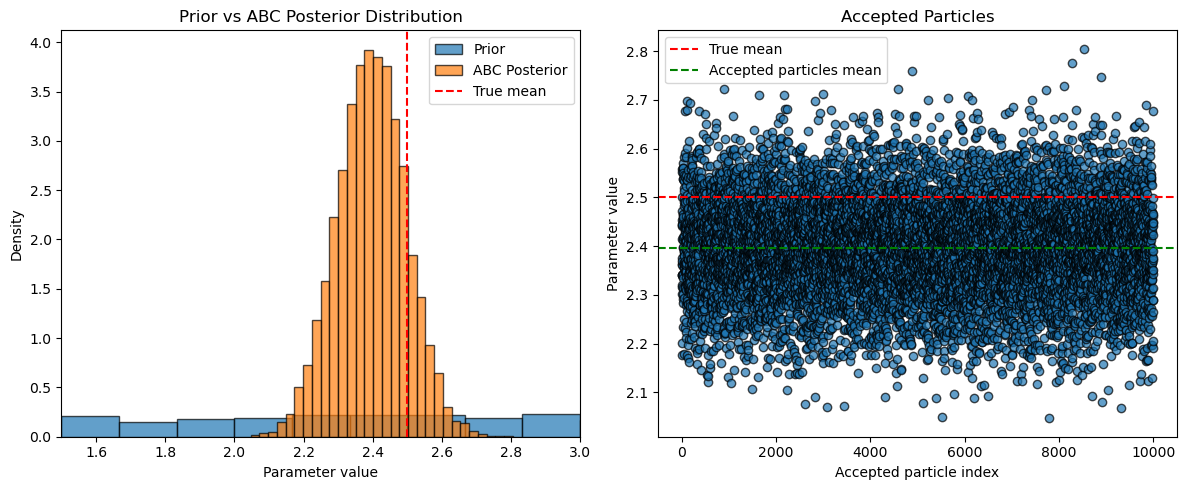


Summary statistics:
True parameter value: 2.500
Mean of accepted particles: 2.396
Standard deviation of accepted particles: 0.100
95% credible interval: [2.199, 2.591]


In [74]:
# Calculate efficiency
efficiency = n_accepted / total_simulations
print(f"\nAlgorithm efficiency: {efficiency:.4f} "
      f"({efficiency*100:.2f}% of simulations were accepted)")

# Plot results
plt.figure(figsize=(12, 5))

# Plot 1: Prior vs posterior distribution
plt.subplot(1, 2, 1)
plt.hist(prior_samples, bins=30, density=True, alpha=0.7, label='Prior', edgecolor='black')
plt.hist(accepted_particles, bins=30, density=True, alpha=0.7, label='ABC Posterior', edgecolor='black')
plt.axvline(mean_tru, color='red', linestyle='--', label='True mean')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.title('Prior vs ABC Posterior Distribution')
plt.xlim(1.5,3.0)
plt.legend()

# Plot 2: Accepted particles with distance information
plt.subplot(1, 2, 2)
plt.scatter(range(len(accepted_particles)), accepted_particles, alpha=0.7, edgecolor='black')
plt.axhline(mean_tru, color='red', linestyle='--', label='True mean')
plt.axhline(np.mean(accepted_particles), color='green', linestyle='--', label='Accepted particles mean')
plt.xlabel('Accepted particle index')
plt.ylabel('Parameter value')
plt.title('Accepted Particles')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary statistics:")
print(f"True parameter value: {mean_tru:.3f}")
print(f"Mean of accepted particles: {np.mean(accepted_particles):.3f}")
print(f"Standard deviation of accepted particles: {np.std(accepted_particles):.3f}")
print(f"95% credible interval: [{np.percentile(accepted_particles, 2.5):.3f}, "
      f"{np.percentile(accepted_particles, 97.5):.3f}]")

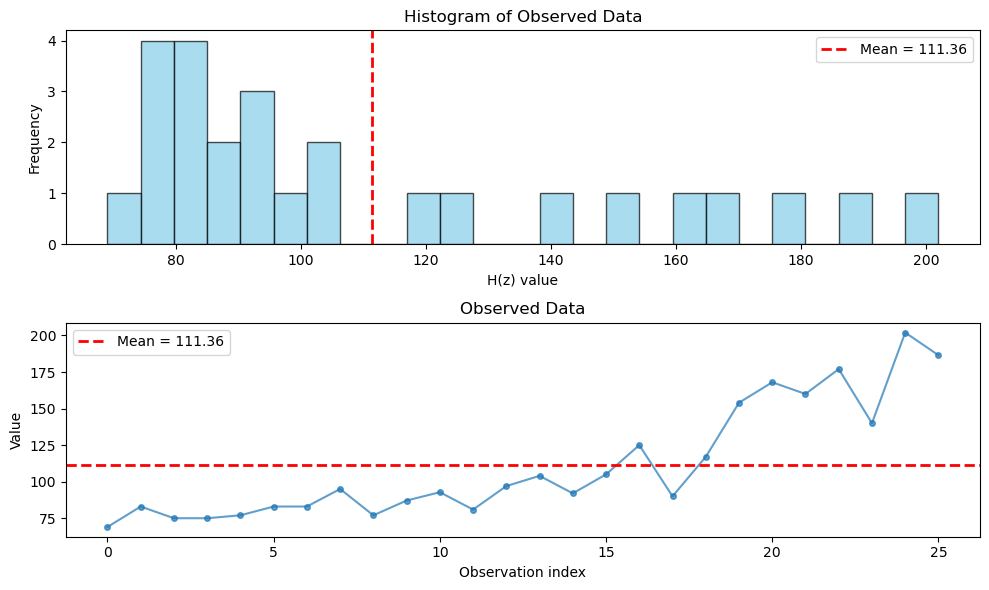


Additional statistics:
Observed data minimum: -0.120
Observed data maximum: 4.352
Observed data median: 2.373


In [78]:
plt.figure(figsize=(10, 6))

# Histogram of the observed data
plt.subplot(2, 1, 1)
plt.hist(hub_obs, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(hub_obs), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(hub_obs):.2f}')
#plt.axvline(mean_tru, color='green', linestyle='--', linewidth=2, label=f'True mean = {mean_tru}')
plt.xlabel('H(z) value')
plt.ylabel('Frequency')
plt.title('Histogram of Observed Data')
plt.legend()

# Time series of the observed data
plt.subplot(2, 1, 2)
plt.plot(hub_obs, 'o-', alpha=0.7, markersize=4)
plt.axhline(np.mean(hub_obs), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(hub_obs):.2f}')
#plt.axhline(mean_tru, color='green', linestyle='--', linewidth=2, label=f'True mean = {mean_tru}')
plt.xlabel('Observation index')
plt.ylabel('Value')
plt.title('Observed Data')
plt.legend()

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"\nAdditional statistics:")
print(f"Observed data minimum: {np.min(data_obs):.3f}")
print(f"Observed data maximum: {np.max(data_obs):.3f}")
print(f"Observed data median: {np.median(data_obs):.3f}")

## Example in a Cosmological Model 
#### For this example we consider the CPL parametrization when the EoS for the DE is given by 
$$
w(z) = w_0 + w_a \frac{z}{1+z}

$$


In [82]:
Omega_m0 = 0.3
Omega_L0 = 0.7
H0 = 71
zvals = np.linspace(0,3,100)
def Hubble_cpl(z, w0, wa):
    
    matter_term = Omega_m0 * (1 + z)**3
    
    de_term = Omega_L0 * (1+z)**(3*(1+w0+wa)) * np.exp(-3*wa*z/(1+z))
    return  H0 * np.sqrt(matter_term + de_term)


w0_test, wa_test = -1, 0  # LCDM case
Hubble_lcdm = Hubble_cpl(zvals, w0_test, wa_test)


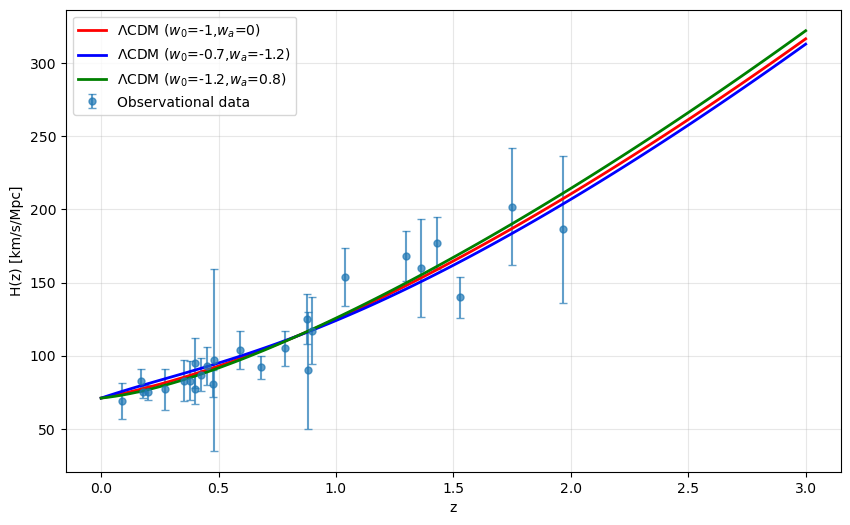

In [103]:
arr_hub = np.loadtxt('/home/alfonsozapata/SimpleMC/simplemc/data/Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]


plt.figure(figsize=(10, 6))
plt.errorbar(z_obs, hub_obs, yerr=error_obs, fmt='o', markersize=5, 
             capsize=3, alpha=0.7, label='Observational data')
plt.plot(zvals,Hubble_lcdm, 'r-', linewidth=2, label='$\Lambda$CDM ($w_0$=-1,$w_a$=0)')
plt.plot(zvals,Hubble_cpl(zvals,w0 = -0.7,wa = -1.2), 'b-', linewidth=2, label='$\Lambda$CDM ($w_0$=-0.7,$w_a$=-1.2)')
plt.plot(zvals,Hubble_cpl(zvals,w0 = -1.2,wa = 0.8), 'g-', linewidth=2, label='$\Lambda$CDM ($w_0$=-1.2,$w_a$=0.8)')
plt.xlabel('z')
plt.ylabel('H(z) [km/s/Mpc]')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

plt.show()



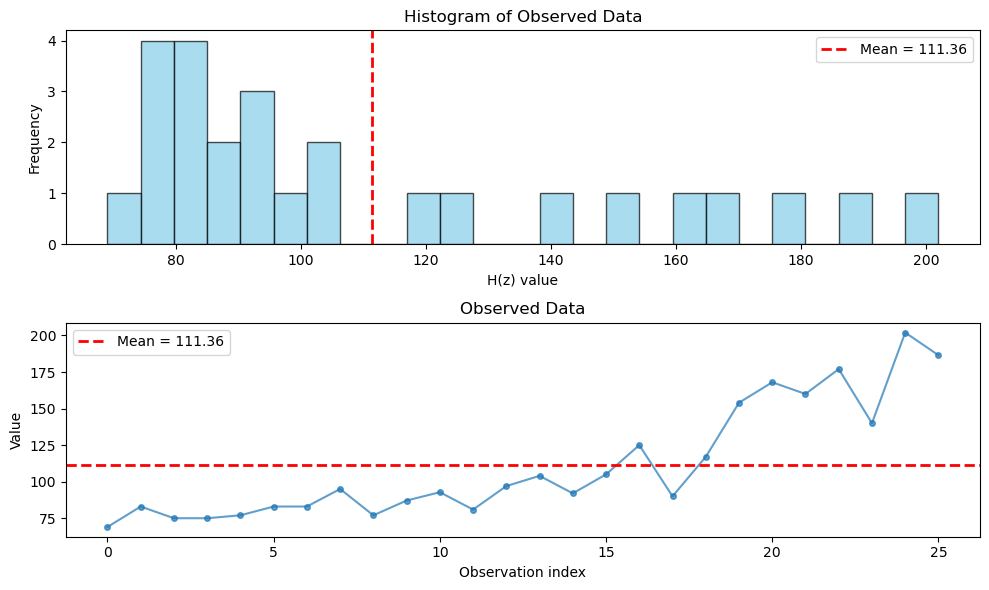


Additional statistics:
Observed data minimum: -0.120
Observed data maximum: 4.352
Observed data median: 2.373


In [104]:
plt.figure(figsize=(10, 6))

# Histogram of the observed data
plt.subplot(2, 1, 1)
plt.hist(hub_obs, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(hub_obs), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(hub_obs):.2f}')
#plt.axvline(mean_tru, color='green', linestyle='--', linewidth=2, label=f'True mean = {mean_tru}')
plt.xlabel('H(z) value')
plt.ylabel('Frequency')
plt.title('Histogram of Observed Data')
plt.legend()

# Time series of the observed data
plt.subplot(2, 1, 2)
plt.plot(hub_obs, 'o-', alpha=0.7, markersize=4)
plt.axhline(np.mean(hub_obs), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(hub_obs):.2f}')
#plt.axhline(mean_tru, color='green', linestyle='--', linewidth=2, label=f'True mean = {mean_tru}')
plt.xlabel('Observation index')
plt.ylabel('Value')
plt.title('Observed Data')
plt.legend()

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"\nAdditional statistics:")
print(f"Observed data minimum: {np.min(data_obs):.3f}")
print(f"Observed data maximum: {np.max(data_obs):.3f}")
print(f"Observed data median: {np.median(data_obs):.3f}")

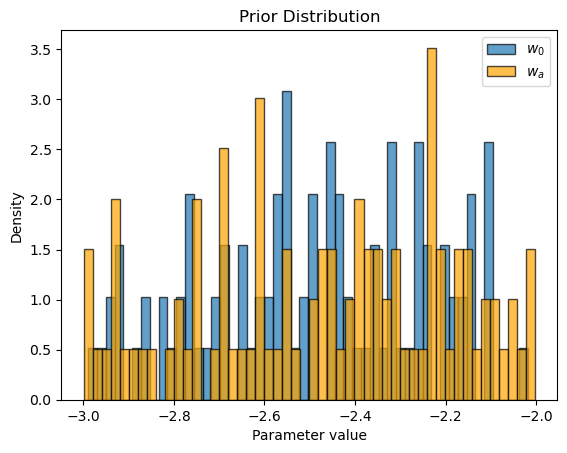

In [135]:
# we need define our priors for the parameters w0 and wa 
def prior_0():
    w0 = uniform.rvs(loc=-3, scale=1)  
    return  w0
def prior_a():
    wa = uniform.rvs(loc=-3, scale=1)  
    return  wa

prior_samples_0 = [prior_0() for _ in range(100)]
prior_samples_a = [prior_a() for _ in range(100)]

plt.hist(prior_samples_0, bins=50, density=True, alpha=0.7, edgecolor='black',label = '$w_0$')
plt.hist(prior_samples_a, bins=50, density=True,color = 'orange', alpha=0.7, edgecolor='black',label = '$w_a$')

#plt.axvline(np.mean(prior_samples), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(prior_samples):.2f}')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.title('Prior Distribution')
plt.legend()
plt.show()


In [ ]:
plt.hist(prior_samples[], bins=30, density=True, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(prior_samples), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(prior_samples):.2f}')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.title('Prior Distribution')
plt.legend()
plt.show()

In [ ]:
prior_samples = [prior() for _ in range(1000)]
plt.hist(prior_samples, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(prior_samples), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(prior_samples):.2f}')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.title('Prior Distribution')
plt.legend()
plt.show()
